# Analyzing Company Attrition

By Blessy Thomas and Nathan Widlake

IST 652

### Purpose

Looking to learn more about their company, we were hired to analyze their attrition data to see which employees are most likely to leave the organization. The Executive Leadership Team has been noticing the value of their current employees and want to make sure that they understand why some of them are leaving their jobs for other companies. By providing us with internal data on their employees, we are tasked to figure out what features may lead to an employee leaving for other opportunities.

It is very expensive to try and replace an employee in comparison to keeping them, so this study will hopefully provide insights into how to keep the workers happy

Dataset link: https://www.kaggle.com/datasets/saadharoon27/hr-analytics-dataset

### Questions to Answer

Do we have a harder time retaining younger employees than older ones?

When employees get to travel more, does that keep them around longer?

How are we retaining top performers internally?

In [ ]:
#Store your file path in this variable:
path = "C:/Users/Owner/Documents/SU_Q5/IST 652/Project/HR_Analytics.csv"

## Import Packages

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

## Exploration and Cleaning

In [ ]:
def open_data(path):
    """read in the dataframe based on file path on local device"""
    df = pd.read_csv(path)
    return(df)

In [ ]:
hr_DF = open_data(path)
hr_DF.head()

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,4,80,0,0,0,3,0,0,0,0.0


**Remove** all columns with only 1 value, these will not provide value in the analysis

In [ ]:
def remove_one_val_col(data):
    """Remove all the columns with just 1 value, does not provide anything useful"""
    for col in data:
        if(len(data.loc[:,col].unique()) == 1):
            data.pop(col)

In [ ]:
remove_one_val_col(hr_DF)

**Summarize** the data, see how many rows as well as column count/feature info

In [ ]:
def summarize_data(data):
    """Return some summary characteristics such as a columns NA Count, Unique Value count, Number of Columns as well as Rows"""
    data_summary = pd.DataFrame(data.dtypes, columns=["Data Type"])
    data_summary["Null Count"] = data.isnull().sum()
    data_summary["Unique Count"] = data.nunique()

    print("Number of Variables:")
    print(data.shape[1])
    print("")
    print("Number of Employees:")
    print(len(data))
    print("")
    print("Summary of Data:")
    print(data_summary)

We would expect the count of EmpID to match the total number of employees, this signifies that we might have some double
counting.

There are 57 missing values for years with manager, we will need to decide what to do with these rows

In [ ]:
summarize_data(hr_DF)

Number of Variables:
35

Number of Employees:
1480

Summary of Data:
                         Data Type  Null Count  Unique Count
EmpID                       object           0          1470
Age                          int64           0            43
AgeGroup                    object           0             5
Attrition                   object           0             2
BusinessTravel              object           0             4
DailyRate                    int64           0           886
Department                  object           0             3
DistanceFromHome             int64           0            29
Education                    int64           0             5
EducationField              object           0             6
EmployeeNumber               int64           0          1470
EnvironmentSatisfaction      int64           0             4
Gender                      object           0             2
HourlyRate                   int64           0            71
JobInvolvement  

**Look** at some of the duplicate values

It appears that these were entered twice by accident, will need to remove in order not to double count


In [ ]:
dup_df = hr_DF[hr_DF.duplicated('EmpID', keep=False) == True]
dup_df.head(10)

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
161,RM1465,26,26-35,No,Travel_Rarely,1167,Sales,5,3,Other,...,3,4,0,5,2,3,4,2,0,0.0
162,RM1465,26,26-35,No,Travel_Rarely,1167,Sales,5,3,Other,...,3,4,0,5,2,3,4,2,0,5.0
210,RM1468,27,26-35,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,...,4,2,1,6,0,3,6,2,0,3.0
211,RM1468,27,26-35,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,...,4,2,1,6,0,3,6,2,0,3.0
327,RM1461,29,26-35,No,Travel_Rarely,468,Research & Development,28,4,Medical,...,3,2,0,5,3,1,5,4,0,4.0
328,RM1461,29,26-35,No,Travel_Rarely,468,Research & Development,28,4,Medical,...,3,2,0,5,3,1,5,4,0,4.0
457,RM1464,31,26-35,No,Non-Travel,325,Research & Development,5,3,Medical,...,3,2,0,10,2,3,9,4,1,7.0
458,RM1464,31,26-35,No,Non-Travel,325,Research & Development,5,3,Medical,...,3,2,0,10,2,3,9,4,1,7.0
654,RM1470,34,26-35,No,TravelRarely,628,Research & Development,8,3,Medical,...,3,1,0,6,3,4,4,3,1,2.0
655,RM1470,34,26-35,No,TravelRarely,628,Research & Development,8,3,Medical,...,3,1,0,6,3,4,4,3,1,2.0


Dropping duplicates on EmpID since those should be unique

In [ ]:
hr_DF['EmpID'] = hr_DF['EmpID'].drop_duplicates()

In [ ]:
hr_DF=hr_DF.dropna(subset=['EmpID'])

Now there are no more duplicates in the data frame

In [ ]:
hr_DF[hr_DF.duplicated('EmpID', keep=False) == True]

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


In [ ]:
summarize_data(hr_DF)

Number of Variables:
35

Number of Employees:
1470

Summary of Data:
                         Data Type  Null Count  Unique Count
EmpID                       object           0          1470
Age                          int64           0            43
AgeGroup                    object           0             5
Attrition                   object           0             2
BusinessTravel              object           0             4
DailyRate                    int64           0           886
Department                  object           0             3
DistanceFromHome             int64           0            29
Education                    int64           0             5
EducationField              object           0             6
EmployeeNumber               int64           0          1470
EnvironmentSatisfaction      int64           0             4
Gender                      object           0             2
HourlyRate                   int64           0            71
JobInvolvement  

Filling all the missing values with the average for that employees age group, assuming age is a good indicator

In [ ]:
age_group_averages = hr_DF.groupby('AgeGroup')['YearsWithCurrManager'].transform('mean')

hr_DF['YearsWithCurrManager'] = hr_DF['YearsWithCurrManager'].fillna(age_group_averages)

In [ ]:
summarize_data(hr_DF)

Number of Variables:
35

Number of Employees:
1470

Summary of Data:
                         Data Type  Null Count  Unique Count
EmpID                       object           0          1470
Age                          int64           0            43
AgeGroup                    object           0             5
Attrition                   object           0             2
BusinessTravel              object           0             4
DailyRate                    int64           0           886
Department                  object           0             3
DistanceFromHome             int64           0            29
Education                    int64           0             5
EducationField              object           0             6
EmployeeNumber               int64           0          1470
EnvironmentSatisfaction      int64           0             4
Gender                      object           0             2
HourlyRate                   int64           0            71
JobInvolvement  

Collecting information about some columns, including the value and the count of each value

In [ ]:
def data_view(data, field):
    """Enter a df and field to see the count of employees by value in field"""
    data_count = Counter(data[field]).most_common()
    data_df= pd.DataFrame(data_count)
    data_df.rename(columns={0:{field}, 1:"Count"}, inplace=True)
    print(f"{field} Summary:")
    print(data_df.to_markdown())

It looks like for BusinessTravel there is some mis-typed information, where TravelRarely was supposed to have an _ but it was missed

In [ ]:
data_view(hr_DF, 'BusinessTravel')

BusinessTravel Summary:
|    | {'BusinessTravel'}   |   Count |
|---:|:---------------------|--------:|
|  0 | Travel_Rarely        |    1036 |
|  1 | Travel_Frequently    |     277 |
|  2 | Non-Travel           |     150 |
|  3 | TravelRarely         |       7 |


In [ ]:
hr_DF['BusinessTravel'] = hr_DF['BusinessTravel'].replace({'TravelRarely': 'Travel_Rarely'}, regex=True, inplace=False)
data_view(hr_DF, 'BusinessTravel')

BusinessTravel Summary:
|    | {'BusinessTravel'}   |   Count |
|---:|:---------------------|--------:|
|  0 | Travel_Rarely        |    1043 |
|  1 | Travel_Frequently    |     277 |
|  2 | Non-Travel           |     150 |


In [ ]:
data_view(hr_DF, 'Department')

Department Summary:
|    | {'Department'}         |   Count |
|---:|:-----------------------|--------:|
|  0 | Research & Development |     961 |
|  1 | Sales                  |     446 |
|  2 | Human Resources        |      63 |


In [ ]:
data_view(hr_DF, 'EducationField')

EducationField Summary:
|    | {'EducationField'}   |   Count |
|---:|:---------------------|--------:|
|  0 | Life Sciences        |     606 |
|  1 | Medical              |     464 |
|  2 | Marketing            |     159 |
|  3 | Technical Degree     |     132 |
|  4 | Other                |      82 |
|  5 | Human Resources      |      27 |


In [ ]:
data_view(hr_DF, 'SalarySlab')

SalarySlab Summary:
|    | {'SalarySlab'}   |   Count |
|---:|:-----------------|--------:|
|  0 | Upto 5k          |     749 |
|  1 | 5k-10k           |     440 |
|  2 | 10k-15k          |     148 |
|  3 | 15k+             |     133 |


# Hypothesis #1

Given the nature of younger employees, we estimate that those younger employees tend to leave more often

In [ ]:
data_view(hr_DF, 'AgeGroup')

AgeGroup Summary:
|    | {'AgeGroup'}   |   Count |
|---:|:---------------|--------:|
|  0 | 26-35          |     606 |
|  1 | 36-45          |     468 |
|  2 | 46-55          |     226 |
|  3 | 18-25          |     123 |
|  4 | 55+            |      47 |


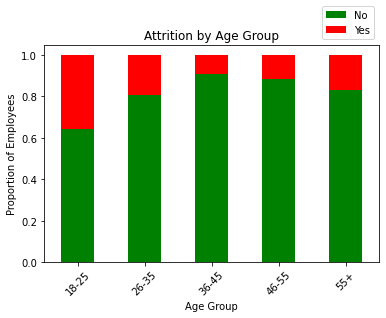

In [ ]:
age_attrition = hr_DF.groupby('AgeGroup')['Attrition'].value_counts(normalize=True).unstack()
age_attrition.plot(kind='bar', stacked='True',color=['green', 'red'])
plt.xticks(rotation=45)
plt.legend(loc='upper right', bbox_to_anchor=(1, 1.2))
plt.title('Attrition by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion of Employees')
plt.show()

## Results

The code above generated a stacked bar chart that shows the proportion of attrition for each age group, which allows for a comparison of attrition rates between younger and older employees. It can be seen that out of the five age groups, the age group 18-25 has the highest proportion of employees that displayed attrition or left the company whereas the other and older age groups displayed significantly smaller proportions of attrtition. Therefore, this visualization indicates that the company has a harder time retaining younger employees than older employees as older employees displayed reduced proportions of attrition. The slight increase in attrition would persumed to be due to retirement.

# Hypothesis #2

Given the nature of travel, we believe that employees who get to travel more will ultimatly choose to leave the company as they are most likely to experience burnout and wish to choose a different role that keeps them more local to their homes

In [ ]:
data_view(hr_DF, 'BusinessTravel')

BusinessTravel Summary:
|    | {'BusinessTravel'}   |   Count |
|---:|:---------------------|--------:|
|  0 | Travel_Rarely        |    1043 |
|  1 | Travel_Frequently    |     277 |
|  2 | Non-Travel           |     150 |


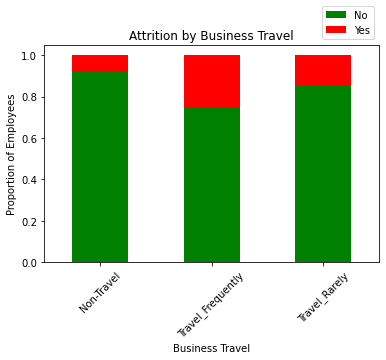

In [ ]:
travel_attrition = hr_DF.groupby('BusinessTravel')['Attrition'].value_counts(normalize=True).unstack()
travel_attrition.plot(kind='bar', stacked=True, color=['green', 'red'])
plt.xticks(rotation=45)
plt.legend(loc='upper right', bbox_to_anchor=(1, 1.2))
plt.title('Attrition by Business Travel')
plt.xlabel('Business Travel')
plt.ylabel('Proportion of Employees')
plt.show()

## Results

The code above generated a stacked bar chart that shows the proportion of attrition for each category of business travel, allowing for a comparison of attrition rates based on travel frequency. It can be seen that out of the four travel frequency categories, the category 'Travel_Frequently' has the highest proportion of employees that displayed attrition or left the company whereas the other travel frequency categories displayed significantly smaller proportions of attrition. Therefore, this visualization indicates that being allowed to travel more does not keep employees around longer in the company as employees who conducted little to no travel displayed reduced proportions of attrition.

# Hypothesis #3

If we look at our people leaving the company then we'll see that we manage to keep our top performers

In [ ]:
select_columns = ['EmpID', 'PerformanceRating', 'Attrition', 'Department']
top_perf_df = hr_DF[select_columns]

In [ ]:
data_view(top_perf_df, 'PerformanceRating')

PerformanceRating Summary:
|    |   {'PerformanceRating'} |   Count |
|---:|------------------------:|--------:|
|  0 |                       3 |    1244 |
|  1 |                       4 |     226 |


Create column that identifies top performers

In [ ]:
def map_performance_rating(rating):
    if rating <= 3:
        return 'No'
    elif rating >= 4:
        return 'Yes'
    else:
        return 'Unknown'

In [ ]:
top_perf_df['Top_Perf'] = top_perf_df['PerformanceRating'].apply(map_performance_rating)

<ipython-input-29-992ed8c19830>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_perf_df['Top_Perf'] = top_perf_df['PerformanceRating'].apply(map_performance_rating)


In [ ]:
top_perf_df

,EmpID,PerformanceRating,Attrition,Department,Top_Perf
0,RM297,3,Yes,Research & Development,No
1,RM302,3,No,Sales,No
2,RM458,3,Yes,Sales,No
3,RM728,3,No,Research & Development,No
4,RM829,3,Yes,Research & Development,No
...,...,...,...,...,...
1475,RM412,3,No,Research & Development,No
1476,RM428,3,No,Sales,No
1477,RM537,3,No,Sales,No
1478,RM880,3,No,Sales,No


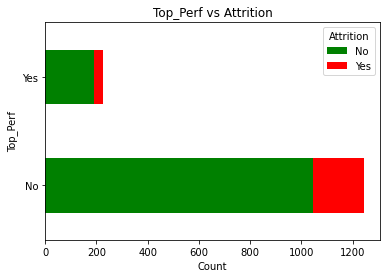

In [ ]:
grouped_df = top_perf_df.groupby(['Attrition', 'Top_Perf']).size().unstack()

grouped_df = grouped_df.transpose()

ax = grouped_df.plot(kind='barh', stacked=True, color=['green', 'red'])

plt.xlabel('Count')
plt.ylabel('Top_Perf')
plt.title('Top_Perf vs Attrition')

plt.show()

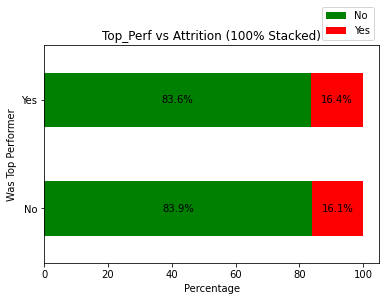

In [ ]:
grouped_df_percentage = grouped_df.div(grouped_df.sum(axis=1), axis=0) * 100

ax = grouped_df_percentage.plot(kind='barh', stacked=True, color=['green', 'red'])

for patch in ax.patches:
    width, height = patch.get_width(), patch.get_height()
    x, y = patch.get_xy()
    percentage_label = f'{width:.1f}%'
    ax.text(x + width / 2, y + height / 2, percentage_label, ha='center', va='center')
plt.legend(loc='upper right', bbox_to_anchor=(1, 1.2))
plt.xlabel('Percentage')
plt.ylabel('Was Top Performer')
plt.title('Top_Perf vs Attrition (100% Stacked)')

plt.show()

Create a function that makes a visualization based on the column you want

In [ ]:
def department_viz(df, column_name):
    """Creating a function that takes a DF and specific department and returns bar plot"""
    viz_df = df[df['Department'] == column_name]
    grouped_df = viz_df.groupby(['Attrition', 'Top_Perf']).size().unstack()

    grouped_df = grouped_df.transpose()

    ax = grouped_df.plot(kind='barh', stacked=True, color=['green', 'red'])

    plt.xlabel('Count')
    plt.ylabel('Was Top Performer')
    plt.title(f'{column_name} Attrition by Performance Level')

    plt.show()

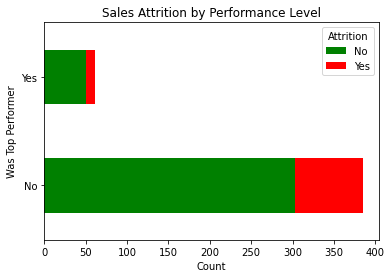

In [ ]:
department_viz(top_perf_df, "Sales")

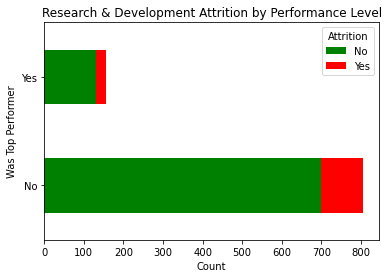

In [ ]:
department_viz(top_perf_df, "Research & Development")

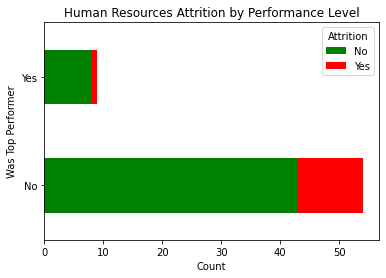

In [ ]:
department_viz(top_perf_df, "Human Resources")

### Results

What was interesting about these results were that not only were the proportions pretty even across the whole company but they were also almost exactly the same between every department within the company. The hypothesis was that we are able to keep majority of our top performers, which looks true with ~84% not leaving, but the proportions are also same for those who are not considered top performers. Sales, R&D, as well as HR all have different number of employees but the the equality of those top performers who stay lead us to conclude that this is not a major issue with the organization.

# Model

In [ ]:
columns_to_remove = ['EmpID', 'Age', 'EmployeeNumber','HourlyRate','MonthlyRate','MonthlyIncome', 'DailyRate']
model_df = hr_DF.drop(columns=columns_to_remove)


In [ ]:
summarize_data(model_df)

Number of Variables:
28

Number of Employees:
1470

Summary of Data:
                         Data Type  Null Count  Unique Count
AgeGroup                    object           0             5
Attrition                   object           0             2
BusinessTravel              object           0             3
Department                  object           0             3
DistanceFromHome             int64           0            29
Education                    int64           0             5
EducationField              object           0             6
EnvironmentSatisfaction      int64           0             4
Gender                      object           0             2
JobInvolvement               int64           0             4
JobLevel                     int64           0             5
JobRole                     object           0             9
JobSatisfaction              int64           0             4
MaritalStatus               object           0             3
SalarySlab      

In [ ]:
model_df.head()

,AgeGroup,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,18-25,Yes,Travel_Rarely,Research & Development,3,3,Life Sciences,3,Male,3,...,3,3,0,0,2,3,0,0,0,0.0
1,18-25,No,Travel_Rarely,Sales,10,3,Medical,4,Female,2,...,3,1,0,0,2,3,0,0,0,0.0
2,18-25,Yes,Travel_Frequently,Sales,5,3,Marketing,2,Male,3,...,3,4,0,0,3,3,0,0,0,0.0
3,18-25,No,Non-Travel,Research & Development,5,2,Life Sciences,2,Male,3,...,3,4,0,0,2,3,0,0,0,0.0
4,18-25,Yes,Non-Travel,Research & Development,8,1,Medical,3,Male,3,...,3,4,0,0,0,3,0,0,0,0.0


In [ ]:
columns_to_remove = ['EmpID', 'Age', 'EmployeeNumber','HourlyRate','MonthlyRate','MonthlyIncome', 'DailyRate']
model_df = hr_DF.drop(columns=columns_to_remove)

Create a function to map the columns to a numeric value for modeling

In [ ]:
def map_column(df, column_name):
    mapping_dict = {
        'Attrition': {'Yes': 1, 'No': 0},
        'Gender': {'Male': 1, 'Female': 0},
        'OverTime': {'Yes': 1, 'No': 0},
        'BusinessTravel': {'Travel_Rarely': 1, 'Travel_Frequently': 2, 'Non-Travel': 3, 'TravelRarely': 4},
        'SalarySlab': {'Upto 5k': 1, '5k-10k': 2, '10k-15k': 3, '15k+': 4},
        'AgeGroup': {'18-25': 1, '26-35': 2, '36-45': 3, '46-55': 4, '55+': 5},
        'MaritalStatus': {'Single': 1, 'Divorced': 2, 'Married': 3},
        'Department': {'Research & Development': 1, 'Sales': 2, 'Human Resources': 3},
        'EducationField': {'Life Sciences': 1, 'Medical': 2, 'Marketing': 3, 'Technical Degree': 4, 'Other': 5, 'Human Resources': 6},
        'JobRole': {'Laboratory Technician': 1, 'Sales Representative': 2, 'Research Scientist': 3, 'Human Resources': 4,
                    'Manufacturing Director': 5, 'Sales Executive': 6, 'Healthcare Representative': 7, 'Research Director': 8, 'Manager': 9}
    }

    if column_name in mapping_dict:
        df[column_name] = df[column_name].map(mapping_dict[column_name])
        return df
    else:
        print(f"Column '{column_name}' not found in mapping dictionary.")
        return df


In [ ]:
model_df = map_column(model_df, 'Attrition')
model_df = map_column(model_df, 'Gender')
model_df = map_column(model_df, 'OverTime')
model_df = map_column(model_df, 'BusinessTravel')
model_df = map_column(model_df, 'SalarySlab')
model_df = map_column(model_df, 'AgeGroup')
model_df = map_column(model_df, 'MaritalStatus')
model_df = map_column(model_df, 'Department')
model_df = map_column(model_df, 'EducationField')
model_df = map_column(model_df, 'JobRole')

Checking one of the columns

In [ ]:
model_df['Attrition']

0       1
1       0
2       1
3       0
4       1
       ..
1475    0
1476    0
1477    0
1478    0
1479    0
Name: Attrition, Length: 1470, dtype: int64

Function to covert all variables as a Category

In [ ]:
def convert_to_category(df, column_name):
    """Create a function that takes a DF and Column name and converts that column to category"""
    df[column_name] = df[column_name].astype('category')
    return df

In [ ]:
model_df = convert_to_category(model_df, "Attrition")
model_df = convert_to_category(model_df, "Gender")
model_df = convert_to_category(model_df, "OverTime")
model_df = convert_to_category(model_df, "BusinessTravel")
model_df = convert_to_category(model_df, "SalarySlab")
model_df = convert_to_category(model_df, "AgeGroup")
model_df = convert_to_category(model_df, "MaritalStatus")
model_df = convert_to_category(model_df, "Department")
model_df = convert_to_category(model_df, "EducationField")
model_df = convert_to_category(model_df, "JobRole")

In [ ]:
print(model_df.dtypes)

AgeGroup                    category
Attrition                   category
BusinessTravel              category
Department                  category
DistanceFromHome               int64
Education                      int64
EducationField              category
EnvironmentSatisfaction        int64
Gender                      category
JobInvolvement                 int64
JobLevel                       int64
JobRole                     category
JobSatisfaction                int64
MaritalStatus               category
SalarySlab                  category
NumCompaniesWorked             int64
OverTime                    category
PercentSalaryHike              int64
PerformanceRating              int64
RelationshipSatisfaction       int64
StockOptionLevel               int64
TotalWorkingYears              int64
TrainingTimesLastYear          int64
WorkLifeBalance                int64
YearsAtCompany                 int64
YearsInCurrentRole             int64
YearsSinceLastPromotion        int64
Y

For importance, split 80-20

In [ ]:
target_variable = 'Attrition'

X = model_df.drop(target_variable, axis=1)
y = model_df[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

feature_importances = model.feature_importances_

In [ ]:
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                     Feature  Importance
3           DistanceFromHome    0.097386
16         PercentSalaryHike    0.072239
9                   JobLevel    0.071771
14        NumCompaniesWorked    0.071485
5             EducationField    0.069386
25   YearsSinceLastPromotion    0.058888
15                  OverTime    0.052061
24        YearsInCurrentRole    0.049178
10                   JobRole    0.045141
19          StockOptionLevel    0.044393
8             JobInvolvement    0.044115
20         TotalWorkingYears    0.040364
11           JobSatisfaction    0.035175
23            YearsAtCompany    0.033369
26      YearsWithCurrManager    0.033319
22           WorkLifeBalance    0.029641
6    EnvironmentSatisfaction    0.022645
18  RelationshipSatisfaction    0.022446
21     TrainingTimesLastYear    0.022242
12             MaritalStatus    0.020080
2                 Department    0.019240
4                  Education    0.016720
0                   AgeGroup    0.015641
17         Perfo

Picking features that have a 0.05 or above importance to attrition

In [ ]:
select_columns = ['DistanceFromHome', 'PercentSalaryHike', 'JobLevel', 'NumCompaniesWorked',
                 'EducationField', 'YearsSinceLastPromotion', 'Attrition' , 'OverTime']

tree_df = model_df[select_columns]

In [ ]:
tree_df.head()

,DistanceFromHome,PercentSalaryHike,JobLevel,NumCompaniesWorked,EducationField,YearsSinceLastPromotion,Attrition,OverTime
0,3,13,1,1,1,0,1,0
1,10,12,1,1,2,0,0,0
2,5,14,1,1,3,0,1,1
3,5,15,1,1,1,0,0,0
4,8,12,1,1,2,0,1,0


Continuing the 80-20 split on the model to stay consistent

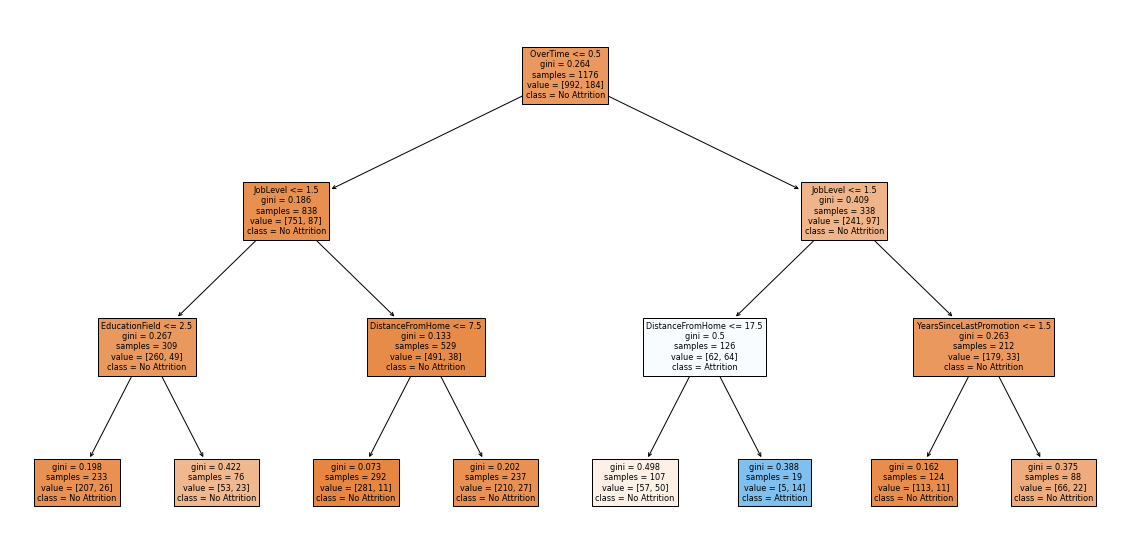

In [ ]:
features = tree_df.drop('Attrition', axis=1)
target = tree_df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=42, max_depth=3)

model.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=features.columns, class_names=['No Attrition', 'Attrition'])
plt.show()

In [ ]:
predictions = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.826530612244898


Calculate baseline accuracy assuming that every did not leave

In [ ]:
baseline_predictions = [0] * len(y_test)

baseline_accuracy = accuracy_score(y_test, baseline_predictions)
print(f"Baseline Accuracy: {baseline_accuracy}")

Baseline Accuracy: 0.8197278911564626


The model above is only slightly better than a baseline assumption that everyone in the company did not leave, however, this does give us some idea about who might leave the organization. At the highest level, we see that those employees who have over time is greater than 1.5, Job Level is less than 1.5, and their distnace from home is greater than 17.5 are all more likely to leave the company.

# Conclusions

After the completion of this analysis, we have discovered some interesting information about our goal. The company in itself does a fairly good job when it comes down to keeping top performers across all departments, keeping over 80% of them is no easy task and is considered a good start. For employees that are required to travel, we see that those who travel the most are more likely to leave the company, so it is recommended that the company looks into adding some additional rest time between each travel day or keep employees traveling in certain regions to avoid burnout. Additionally, it looks like the younger employees don't feel like staying in the company and are more likely to choose to find another opportunity. The ELT should look into offering some additional incentives to make younger employees wish to stay, such as accelerated PTO accumulation or offering some Grad School benefits after 2 years. Finally, with the model providing those in-depth features about who is likely to leave, it is vital that we understand the ethics behind using this study. It should NOT be referenced in hiring processes but as a way to identify and offer support to internal employees to make sure they feel taken care of. Using this data to reject people just for some features is morally wrong and could lead to finanical issues for the organization in the future in the form of lawsuits.